# Imports

In [1]:
from midiutil import MIDIFile 
import pandas as pd
import numpy as np
from sofar_api import get_data
import matplotlib.pylab as plt
from sklearn.preprocessing import normalize
import pygame
from audiolazy import str2midi, midi2str
from data_to_midi import df_to_midi, api_to_midi

#Had to chnage the library imports from parts of the audio lazy library.
# In lazy_analysis.py changed from collections import Sequence, Iterable -> from collections.abc import Sequence, Iterable
# In lazy_core.py changed from collections import, Iterable -> from collections.abc import Iterable
# In lazy_stream.py changed from collections import, Iterable -> from collections.abc import Iterable
# In lazy_misc.py changed from collections import, Iterable -> from collections.abc import Iterable
# In lazy_filters.py changed from collections import, Iterable -> from collections.abc import Iterable
# In lazy_poly.py changed from collections import, Iterable -> from collections.abc import Iterable
# In lazy_itertools.py changed from collections import, Iterable -> from collections.abc import Iterable

pygame 2.5.2 (SDL 2.28.3, Python 3.11.2)
Hello from the pygame community. https://www.pygame.org/contribute.html


# Using Data From CSV

In [37]:
#import csv file into pandas dataframe
df = pd.read_csv("./data/waves.csv")

In [38]:
#display shape and first 5 rows of dataframe
print(df.shape)
df.head()

(40, 381)


,Battery Voltage (V),Power (W),Humidity (%rel),Epoch Time,Significant Wave Height (m),Peak Period (s),Mean Period (s),Peak Direction (deg),Peak Directional Spread (deg),Mean Direction (deg),...,Partition0 Mean Direction (deg),Partition0 Mean Directional Spread (deg),Partition1 Start Frequency (hz),Partition1 End Frequency (hz),Partition1 Significant Wave Height (m),Partition1 Mean Period (s),Partition1 Mean Direction (deg),Partition1 Mean Directional Spread (deg),Mean Barometric Pressure (hPa),Processing Source
0,4.1,-0.24,46.4,1699588561,0.07,7.30,4.82,128.327,29.382,136.457,...,-,-,-,-,-,-,-,-,-,embedded
1,4.1,-0.24,46.4,1699586761,0.05,6.82,4.50,133.725,29.243,137.324,...,-,-,-,-,-,-,-,-,-,embedded
2,4.1,-0.19,44.8,1699584961,0.05,25.60,4.24,228.447,76.229,141.405,...,-,-,-,-,-,-,-,-,-,embedded
3,4.1,-0.19,44.8,1699583161,0.06,6.82,4.12,128.509,21.528,132.368,...,-,-,-,-,-,-,-,-,-,embedded
4,4.1,-0.20,42.4,1699581361,0.06,6.82,3.20,131.668,19.921,137.342,...,-,-,-,-,-,-,-,-,-,embedded


In [39]:
#Data set has many empty columns. Drop them.
small_df = df.drop(columns=df.columns[13:], axis=1)
small_df.head()

,Battery Voltage (V),Power (W),Humidity (%rel),Epoch Time,Significant Wave Height (m),Peak Period (s),Mean Period (s),Peak Direction (deg),Peak Directional Spread (deg),Mean Direction (deg),Mean Directional Spread (deg),Latitude (deg),Longitude (deg)
0,4.1,-0.24,46.4,1699588561,0.07,7.30,4.82,128.327,29.382,136.457,56.342,37.87463,-122.48137
1,4.1,-0.24,46.4,1699586761,0.05,6.82,4.50,133.725,29.243,137.324,46.913,37.87463,-122.48137
2,4.1,-0.19,44.8,1699584961,0.05,25.60,4.24,228.447,76.229,141.405,62.622,37.87463,-122.48138
3,4.1,-0.19,44.8,1699583161,0.06,6.82,4.12,128.509,21.528,132.368,51.119,37.87463,-122.48138
4,4.1,-0.20,42.4,1699581361,0.06,6.82,3.20,131.668,19.921,137.342,53.854,37.87463,-122.48138


In [40]:
small_df.shape

(40, 13)

In [41]:
angles = small_df['Peak Direction (deg)']

In [42]:
xlist = [np.cos(ang) for ang in angles]
ylist = [np.sin(ang) for ang in angles]

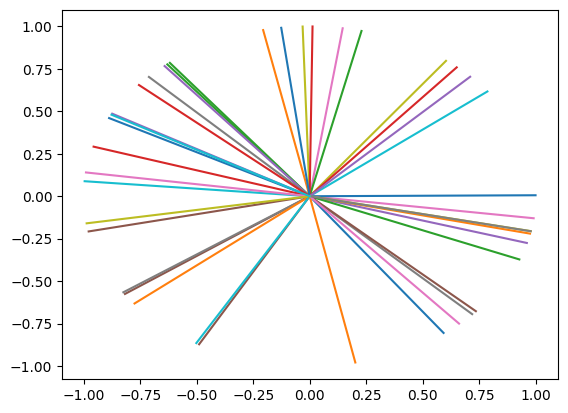

In [43]:
#Visualization of the direction the waves are coming from
for x, y in zip(xlist, ylist):
  plt.plot([0,x],[0,y])
plt.show()

In [44]:
def map_value(value, min_value, max_value, min_result, max_result):
 #maps value (or array of values) from one range to another
 
 result = min_result + (value - min_value)/(max_value - min_value)*(max_result - min_result)
 return result

In [50]:
small_df = df.drop(columns=df.columns[13:], axis=1)
height = small_df["Significant Wave Height (m)"].values
times = small_df["Mean Period (s)"].values
for i in range(1,len(times)):
    times[i] += times[i-1]
times

array([  4.82,   9.32,  13.56,  17.68,  20.88,  24.1 ,  27.92,  30.82,
        33.74,  36.7 ,  39.86,  42.92,  45.96,  49.62,  53.6 ,  57.94,
        61.62,  64.96,  69.18,  72.24,  75.6 ,  79.32,  83.9 ,  88.9 ,
        94.84, 100.52, 106.42, 113.42, 119.8 , 125.3 , 131.52, 136.7 ,
       143.02, 148.8 , 154.24, 159.9 , 165.54, 171.84, 178.3 , 183.46])

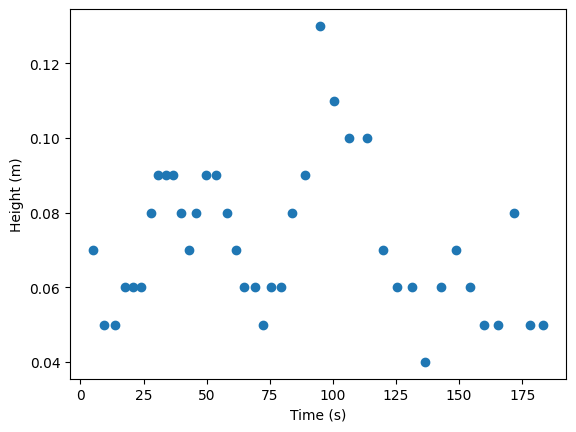

In [51]:
#Visualize Peak Wave over a period of time 
# normalize the data
plt.scatter(times, height)
plt.xlabel("Time (s)")
plt.ylabel("Height (m)")
plt.show()

In [70]:
duration_beats = 60
t_data = map_value(times, 0, max(times), 0,duration_beats)

In [71]:
bpm = 60  
duration_sec = duration_beats*60/bpm  
print('Duration:', duration_sec, 'seconds')

Duration: 60.0 seconds


In [72]:
#Regular Peak Times
#peak_times = small_df["Peak Period (s)"]
#normalized_peak_times = map_value(peak_times, min(peak_times), max(peak_times), 0, 1)
#plt.scatter(times, (normalized_peak_times))
#plt.xlabel("Time (s)")
#plt.ylabel("Peak Times (s)")
#plt.show()

#It looks like theres a reverse correlation between the two graphs

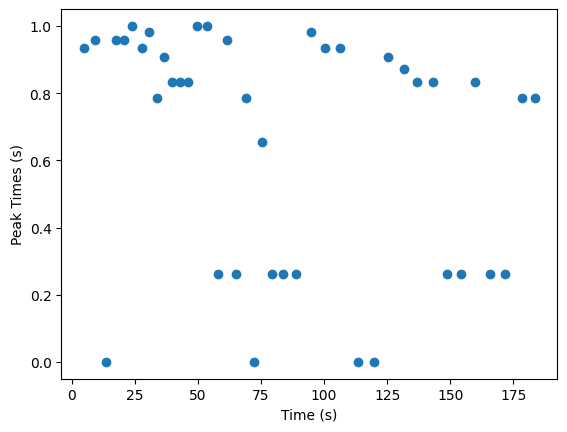

In [93]:
#Inverse Peak Times. Decide which to use
peak_times = small_df["Peak Period (s)"]
normalized_peak_times = map_value(peak_times, min(peak_times), max(peak_times), 0, 1)
normalized_peak_times = 1 - normalized_peak_times
plt.scatter(times,(normalized_peak_times))
plt.xlabel("Time (s)")
plt.ylabel("Peak Times (s)")
plt.show()

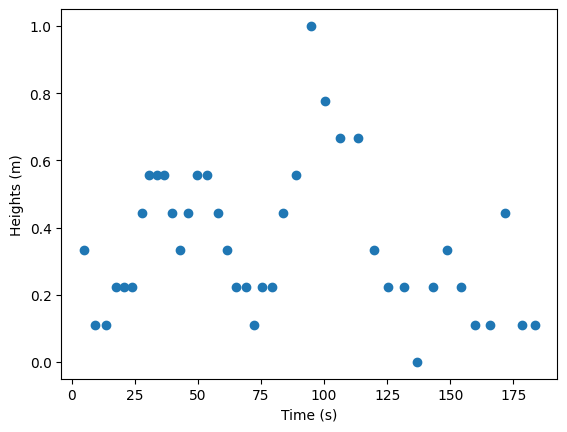

In [94]:
normalized_height = map_value(height, min(height), max(height), 0, 1)
plt.scatter(times,(normalized_height))
plt.xlabel("Time (s)")
plt.ylabel("Heights (m)")
plt.show()

In [95]:
#Deicide Which To Use
#note_names = ['C2','D2','E2','F2','G2','A2','B2',
#             'C3','D3','E3','F3','G3','A3','B3',
#             'C4','D4','E4','F4','G4','A4','B4']

In [96]:
note_names = ['C2','D2','E2','G2','A2',
             'C3','D3','E3','G3','A3',
             'C4','D4','E4','G4','A4']

In [97]:
#note_names = ['C1','C2','G2',
#            'C3','E3','G3','A3','B3',
#             'D4','E4','G4','A4','B4',
#             'D5','E5','G5','A5','B5',
#             'D6','E6','F#6','G6','A6']

In [98]:
note_midis = [str2midi(n) for n in note_names] 
n_notes = len(note_midis)

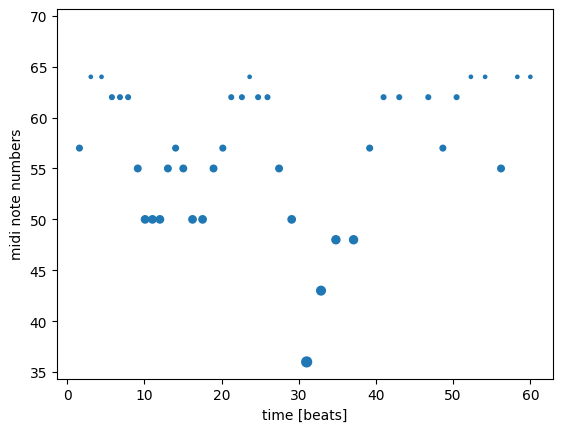

In [99]:
midi_data = []
for i in range(len(normalized_height)):
    note_index = round((map_value(normalized_height[i], 0, 1, n_notes-1, 0))) 
    midi_data.append(note_midis[note_index])
plt.scatter(t_data, midi_data, s=50*normalized_height)
plt.xlabel('time [beats]')
plt.ylabel('midi note numbers')
plt.show()

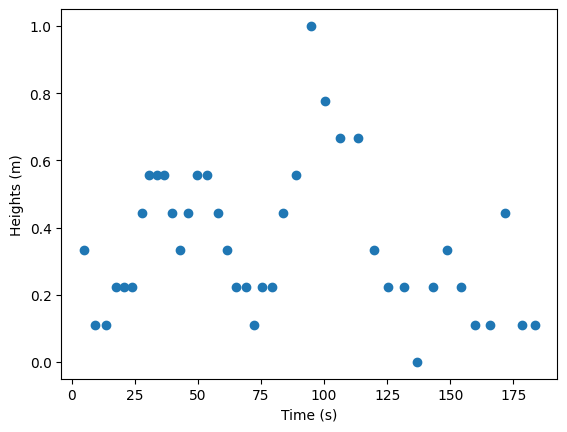

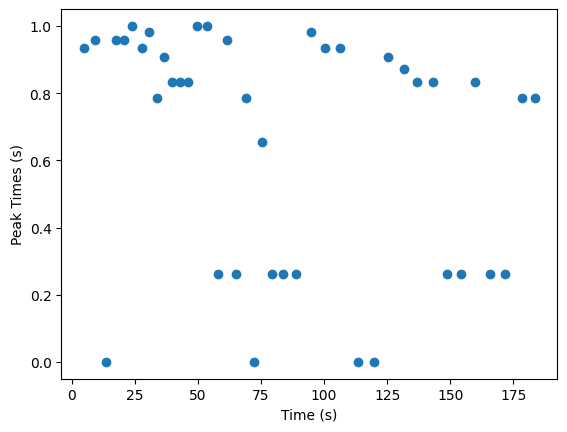

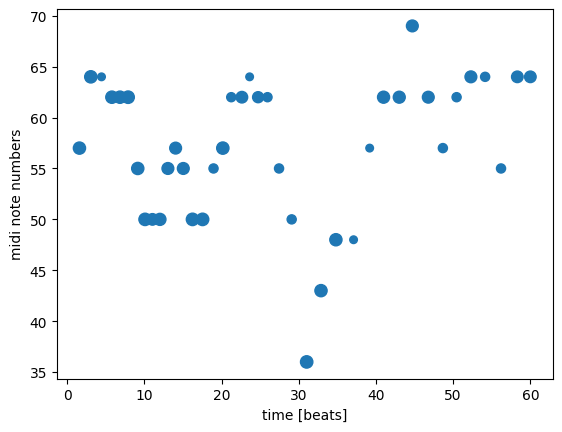

In [122]:
vel_min,vel_max = 30,80   #minimum and maximum note velocity
vel_data = []
for i in range(len(normalized_peak_times)):
    note_velocity = round(map_value(normalized_peak_times[i],0,1,vel_min, vel_max)) 
    vel_data.append(note_velocity)
    


plt.scatter(times,(normalized_height))
plt.xlabel("Time (s)")
plt.ylabel("Heights (m)")
plt.show()

plt.scatter(times,(normalized_peak_times))
plt.xlabel("Time (s)")
plt.ylabel("Peak Times (s)")
plt.show()

plt.scatter(t_data, midi_data, s=vel_data)
plt.xlabel('time [beats]')
plt.ylabel('midi note numbers')
plt.show()

In [123]:
#create midi file object, add tempo
my_midi_file = MIDIFile(1) #one track 
my_midi_file.addTempo(track=0, time=0, tempo=bpm) 
filename = "test_wave_music"
#add midi notes
for i in range(len(t_data)):
    my_midi_file.addNote(track=0, channel=0, time=t_data[i], pitch=midi_data[i], volume=vel_data[i], duration=2)
#create and save the midi file itself
with open(filename + '.mid', "wb") as f:
    my_midi_file.writeFile(f)

In [124]:
pygame.init()
pygame.mixer.music.load(filename + '.mid')
pygame.mixer.music.play()

In [196]:
pygame.mixer.music.stop() #run this to stop, it's the only way!

# Using Pulled Data From API

In [11]:
api_df = get_data(index=1,lim=100,
start='2023-11-09',
end='2023-11-10')

api_df.head()

,significantWaveHeight,peakPeriod,meanPeriod,peakDirection,peakDirectionalSpread,meanDirection,meanDirectionalSpread,timestamp,latitude,longitude,processing_source
0,0.12,6.82,4.16,142.672,28.047,143.941,47.983,2023-11-09T00:26:01.000Z,37.87462,-122.48138,embedded
1,0.08,9.30,4.60,145.967,30.201,143.560,51.308,2023-11-09T00:56:01.000Z,37.87462,-122.48138,embedded
2,0.08,10.24,3.78,141.119,43.390,138.938,54.139,2023-11-09T01:26:01.000Z,37.87462,-122.48138,embedded
3,0.08,4.44,3.60,143.785,19.613,143.150,53.406,2023-11-09T01:56:01.000Z,37.87462,-122.48138,embedded
4,0.05,6.82,4.42,135.000,28.321,137.054,56.090,2023-11-09T02:26:01.000Z,37.87462,-122.48137,embedded


In [12]:
def map_value(value, min_value, max_value, min_result, max_result):
 #maps value (or array of values) from one range to another
 
 result = min_result + (value - min_value)/(max_value - min_value)*(max_result - min_result)
 return result

In [13]:
api_height = api_df["significantWaveHeight"].values
api_times = api_df["meanPeriod"].values
for i in range(1,len(api_times)):
    api_times[i] += api_times[i-1]
api_times

array([  4.16,   8.76,  12.54,  16.14,  20.56,  24.58,  28.88,  34.2 ,
        38.72,  42.8 ,  47.42,  52.5 ,  56.62,  61.82,  67.  ,  70.94,
        76.1 ,  82.56,  88.86,  94.5 , 100.16, 105.6 , 111.38, 117.7 ,
       122.88, 129.1 , 134.6 , 140.98, 147.98, 153.88, 159.56, 165.5 ,
       170.5 , 175.08, 178.8 , 182.16, 185.22, 189.44, 192.78, 196.46,
       200.8 , 204.78, 208.44, 211.48, 214.54, 217.7 , 220.66, 223.58])

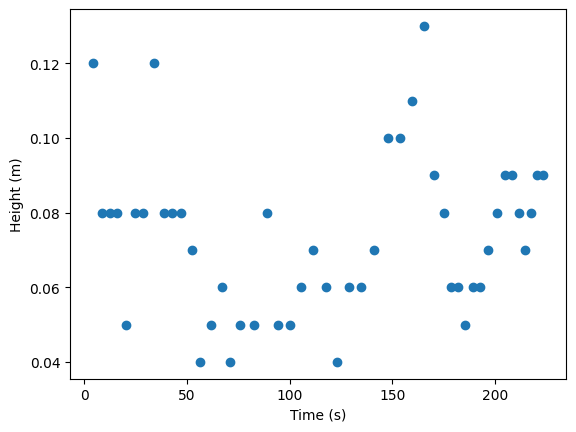

In [14]:
#Visualize Peak Wave over a period of time 
# normalize the data
plt.scatter(api_times, api_height)
plt.xlabel("Time (s)")
plt.ylabel("Height (m)")
plt.show()

In [15]:
duration_beats = 60
api_t_data = map_value(api_times, 0, max(api_times), 0,duration_beats)

In [16]:
bpm = 60  
duration_sec = duration_beats*60/bpm  
print('Duration:', duration_sec, 'seconds')

Duration: 60.0 seconds


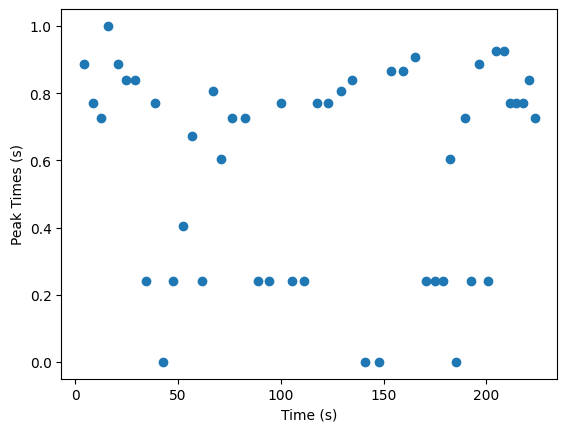

In [17]:
#Inverse Peak Times. Decide which to use
api_peak_times = api_df["peakPeriod"]
api_normalized_peak_times = map_value(api_peak_times, min(api_peak_times), max(api_peak_times), 0, 1)
api_normalized_peak_times = 1-api_normalized_peak_times
plt.scatter(api_times,(api_normalized_peak_times))
plt.xlabel("Time (s)")
plt.ylabel("Peak Times (s)")
plt.show()

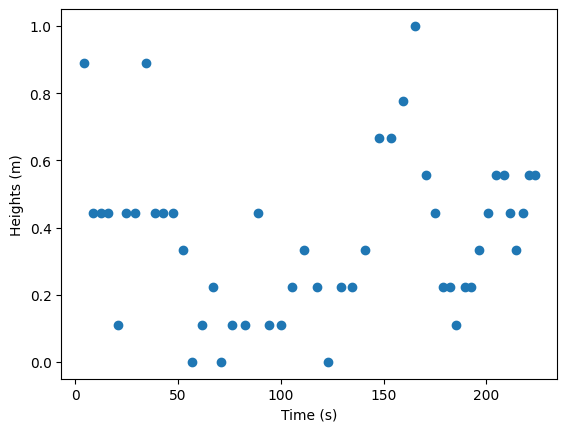

In [18]:
#Inverse heights
api_normalized_height = map_value(api_height, min(api_height), max(api_height), 0, 1)
plt.scatter(api_times,(api_normalized_height))
plt.xlabel("Time (s)")
plt.ylabel("Heights (m)")
plt.show()

In [19]:
note_names = ['C2','D2','E2','G2','A2',
             'C3','D3','E3','G3','A3',
             'C4','D4','E4','G4','A4']

In [20]:
note_midis = [str2midi(n) for n in note_names] 
n_notes = len(note_midis)

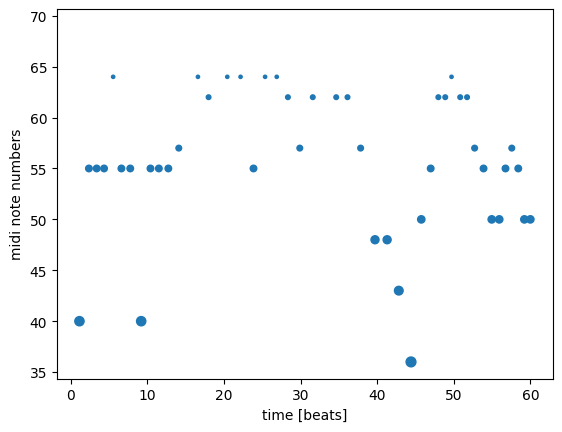

In [21]:
api_midi_data = []
for i in range(len(api_normalized_height)):
    api_note_index = round((map_value(api_normalized_height[i], 0, 1, n_notes-1, 0))) 
    api_midi_data.append(note_midis[api_note_index])
plt.scatter(api_t_data, api_midi_data, s=50*api_normalized_height)
plt.xlabel('time [beats]')
plt.ylabel('midi note numbers')
plt.show()

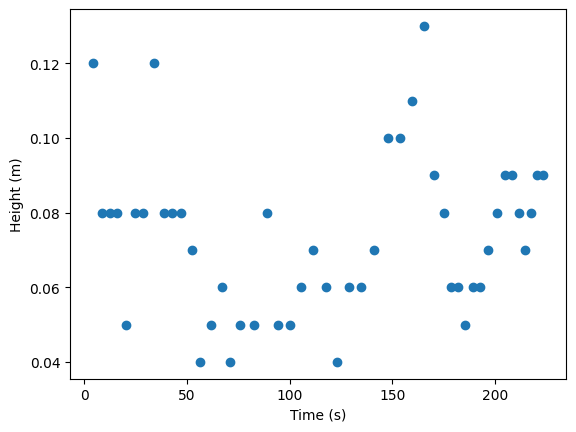

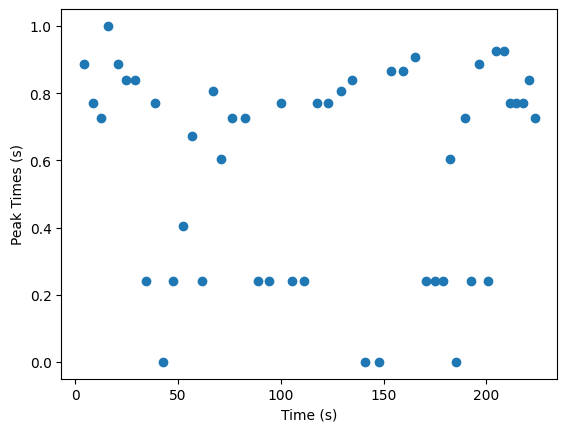

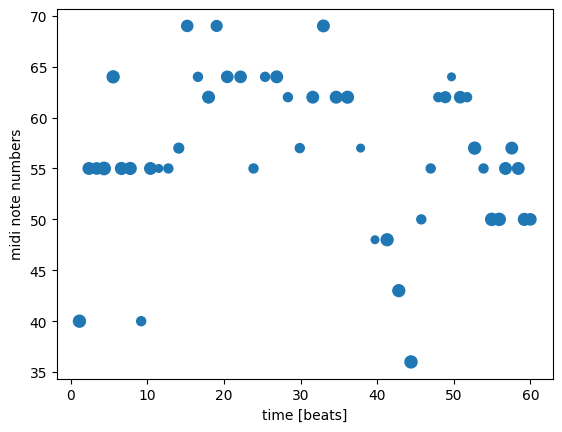

In [22]:
vel_min,vel_max = 30,80   #minimum and maximum note velocity
api_vel_data = []
for i in range(len(api_normalized_peak_times)):
    note_velocity = (round(map_value(api_normalized_peak_times[i],0,1,vel_min, vel_max))) 
    api_vel_data.append(note_velocity)
    
plt.scatter(api_times, api_height)
plt.xlabel("Time (s)")
plt.ylabel("Height (m)")
plt.show()

plt.scatter(api_times,(api_normalized_peak_times))
plt.xlabel("Time (s)")
plt.ylabel("Peak Times (s)")
plt.show()

plt.scatter(api_t_data, api_midi_data, s=api_vel_data)
plt.xlabel('time [beats]')
plt.ylabel('midi note numbers')
plt.show()



In [23]:
#create midi file object, add tempo
my_midi_file = MIDIFile(1) #one track 
my_midi_file.addTempo(track=0, time=0, tempo=bpm) 
api_filename = "api_test_wave_music"
#add midi notes
for i in range(len(api_t_data)):
    my_midi_file.addNote(track=0, channel=0, time=api_t_data[i], pitch=api_midi_data[i], volume=api_vel_data[i], duration=2)
#create and save the midi file itself
with open(api_filename + '.mid', "wb") as f:
    my_midi_file.writeFile(f)

In [120]:
pygame.init()
pygame.mixer.music.load(api_filename + '.mid')
pygame.mixer.music.play()

In [121]:
pygame.mixer.music.stop() #run this to stop, it's the only way!

# Testing API Function

In [2]:
filename="api_function_to_midi"
notes = ['C2','D2','E2','G2','A2',
             'C3','D3','E3','G3','A3',
             'C4','D4','E4','G4','A4']
note_column = "significantWaveHeight"
velocity_column = "peakPeriod"
time_column = "meanPeriod"
beats = 60
bpm = 60
vel_min,vel_max = 50,100
start='2023-11-09'
end='2023-11-10'

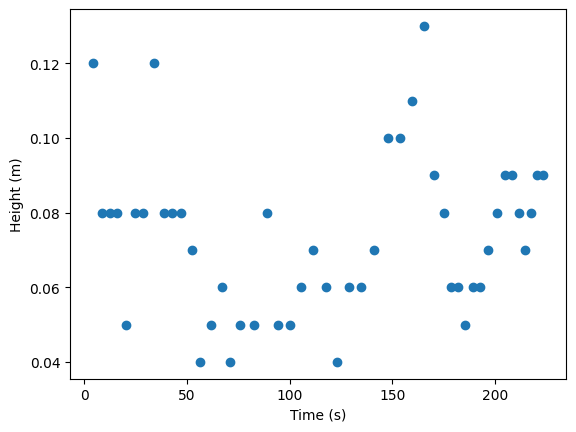

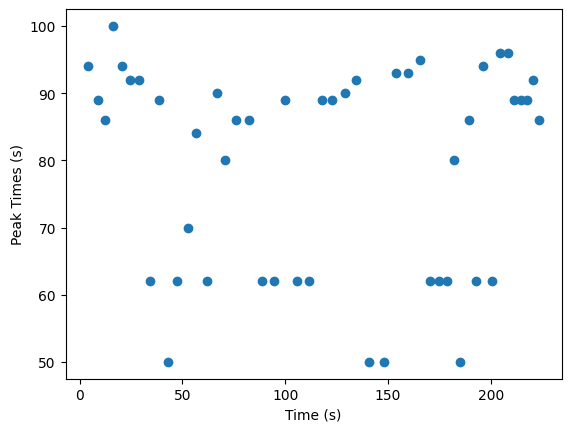

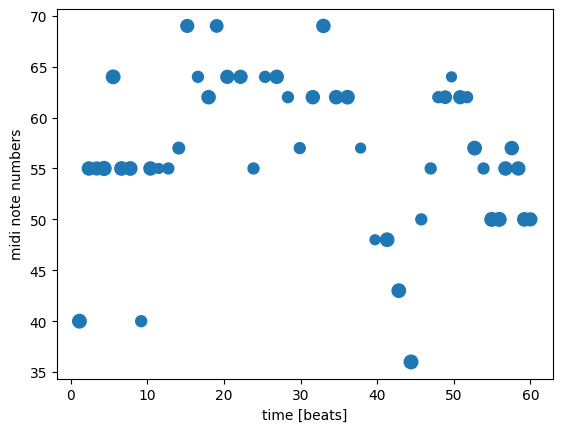

In [3]:
filename= "API_MIDI"
api_df = api_to_midi(start, end, filename, note_column, velocity_column, time_column, beats,bpm, notes, vel_min, vel_max)